In [12]:
import helpers
from helpers import Loader
from sklearn import metrics
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
loader = Loader()

In [3]:
X_trn, Y_trn = loader.load("trn_set", ignore_categorical=False, nrows=100000)
X_dev, Y_dev = loader.load("dev_set", ignore_categorical=False, nrows=10000)

In [4]:
ohe = preprocessing.OneHotEncoder(handle_unknown="ignore")
ohe.fit(X_trn[loader.cat_cols].fillna(0))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [5]:
X_trn_encoded = loader.encode(ohe, X_trn)
X_dev_encoded = loader.encode(ohe, X_dev)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

In [7]:
rf_clf.fit(X_trn_encoded, Y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

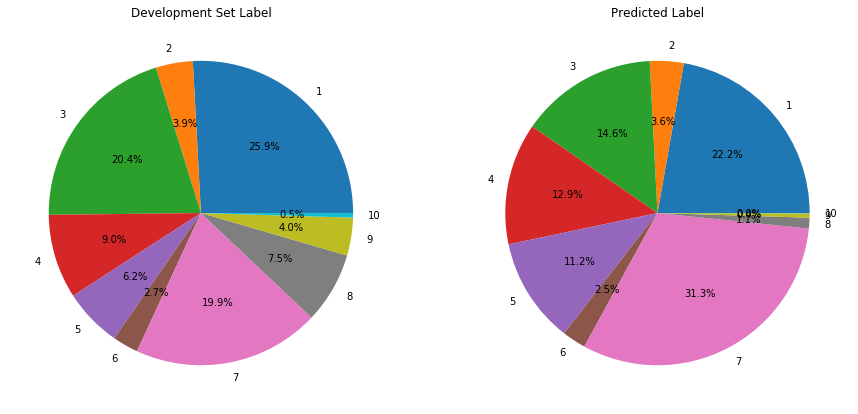

In [13]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

value_counts = Counter(Y_dev)
_ = ax1.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%', 
            labeldistance = 1.1)
ax1.set_title('Development Set Label')

ax2 = plt.subplot(1, 2, 2)

value_counts = Counter(Y_pred)
_ = ax2.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%',
            labeldistance = 1.1)

ax2.set_title('Predicted Label')

plt.show()

In [8]:
Y_dev.value_counts() / len(Y_dev)

1     0.2585
3     0.2041
7     0.1985
4     0.0895
8     0.0755
5     0.0623
9     0.0402
2     0.0393
6     0.0273
10    0.0048
Name: event2, dtype: float64

In [9]:
Y_pred = rf_clf.predict(X_dev_encoded)
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.2983
